In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('./data/gurgaon_properties_missing_value_imputation.csv')
df.head(2)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0


In [6]:
# scrapped latlong from google search
latlong = pd.read_csv('./data/latlong.csv')
latlong.head()

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"


In [7]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [8]:
# merge with sector information to create single dataframe
new_df = df.merge(latlong, on='sector')
new_df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,coordinates,latitude,longitude
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"28.4160° N, 76.9914° E",28.416,76.9914
1,flat,avl 36 gurgaon,sector 36,0.75,7500.0,2.0,2.0,2,5.0,Relatively New,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,"28.4160° N, 76.9914° E",28.416,76.9914
2,flat,signature global park 4,sector 36,1.00,9901.0,3.0,2.0,3,2.0,New Property,...,0.0,0.0,0.0,0.0,0.0,0.0,128.0,"28.4160° N, 76.9914° E",28.416,76.9914
3,flat,krisumi waterfall residences,sector 36,4.10,15501.0,3.0,4.0,3,30.0,New Property,...,1.0,0.0,0.0,0.0,0.0,2.0,49.0,"28.4160° N, 76.9914° E",28.416,76.9914
4,flat,signature global park 4,sector 36,0.72,6660.0,3.0,2.0,3,3.0,Under Construction,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"28.4160° N, 76.9914° E",28.416,76.9914


In [11]:
# Get mean values of 'price','price_per_sqft','built_up_area','latitude','longitude'
# latitude and longitude are mean anyway though
group_df = new_df.groupby('sector').mean(numeric_only=True)[['price','price_per_sqft','built_up_area','latitude','longitude']]
group_df.head()

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,2.092857,11866.571429,1908.857143,28.4537,77.0009
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715


In [12]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [13]:
new_df.to_csv('./data/data_viz1.csv',index=False)

Extract raw data to get feature lists we got for every property
Make a worldcloud from the entire feature list. 
Later this worldcolud can be made based on each sector based on user selection

In [15]:
df1 = pd.read_csv('./data/gurgaon_properties.csv')
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 36 Sohna,flat,signature global park 4,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,"144, Sector 36 Sohna, Gurgaon, Haryana",2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",We need to shift somewhere else,NaN,"['Lift(s)', 'Park']",NaN
1,2 BHK Flat in Sector 89 Gurgaon,flat,smart world gems,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room","O 118d, Sector 89 Gurgaon, Gurgaon, Haryana",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",Smartworld gem4 th floor new construction,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
2,2 BHK Flat in Sector 86 Gurgaon,flat,pyramid elite,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,"Sector 86 Gurgaon, Gurgaon, Haryana",0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",Near to dwarka expressway\nNear to airport,[],"['Intercom Facility', 'Lift(s)', 'Park']","['Environment5 out of 5', 'Safety4.5 out of 5'..."
3,2 BHK Flat in Sohna,flat,breez global hill view,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,not available,"1701 & 1708, Sohna, Gurgaon, Haryana",17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",Both adjacent properties available which can b...,[],"['Feng Shui / Vaastu Compliant', 'Security / F...","['Safety4 out of 5', 'Lifestyle4 out of 5', 'E..."
4,3 BHK Flat in Sector 92 Gurgaon,flat,bestech park view sanskruti,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,"servant room,others","Sector 92 Gurgaon, Gurgaon, Haryana",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...",Check out this 3 bhk apartment for sale in bes...,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'...","['Green Area5 out of 5', 'Construction5 out of..."


In [17]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]
wordcloud_df.head()

,features,sector
0,"['Lift(s)', 'Park']",sector 36
1,"['Power Back-up', 'Intercom Facility', 'Lift(s...",sector 89
2,"['Intercom Facility', 'Lift(s)', 'Park']",sohna road
3,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 92
4,"['Centrally Air Conditioned', 'Water purifier'...",sector 102


In [19]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)
main

['Lift(s)',
 'Park',
 'Power Back-up',
 'Intercom Facility',
 'Lift(s)',
 'Swimming Pool',
 'Park',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Intercom Facility',
 'Lift(s)',
 'Park',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',

In [22]:
feature_text = ' '.join(main)

pickle.dump(feature_text, open('./pickle/feature_text.pkl','wb'))

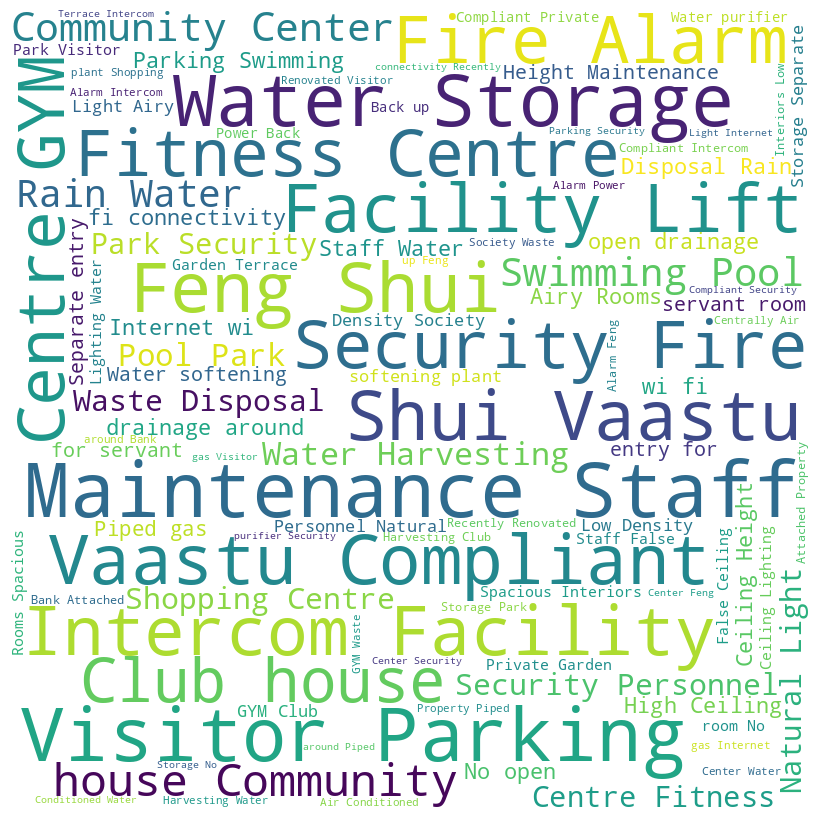

In [25]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [28]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [29]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")
# Show the plot
fig.show()

In [31]:
fig = px.pie(df, names='bedRoom', title='Bedroom availability Distribution')

# Show the plot
fig.show()

In [32]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()

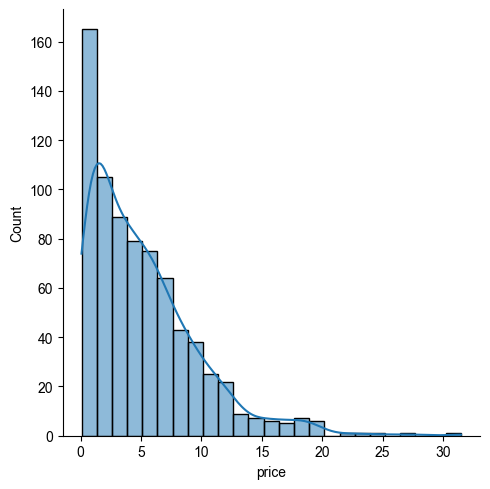

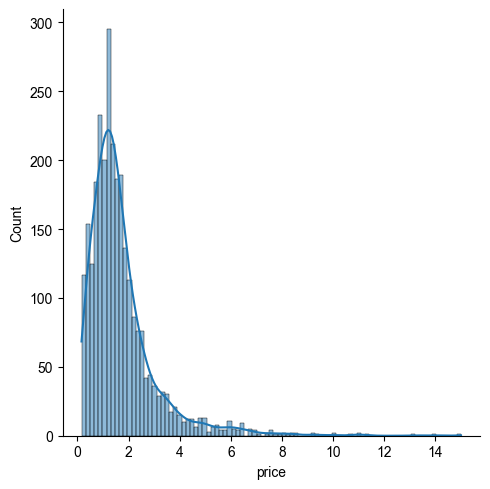

In [39]:
sns.displot(df[df['property_type'] == 'house']['price'], kde=True)
sns.displot(df[df['property_type'] == 'flat']['price'], kde=True)
plt.show()